In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

d=2
h1=d
h2=10*d


b_h1 = np.random.randn(d)
A_h1 = np.random.randn(d, h1)
b_h2 = np.random.randn(d)
A_h2 = np.random.randn(d, h2)

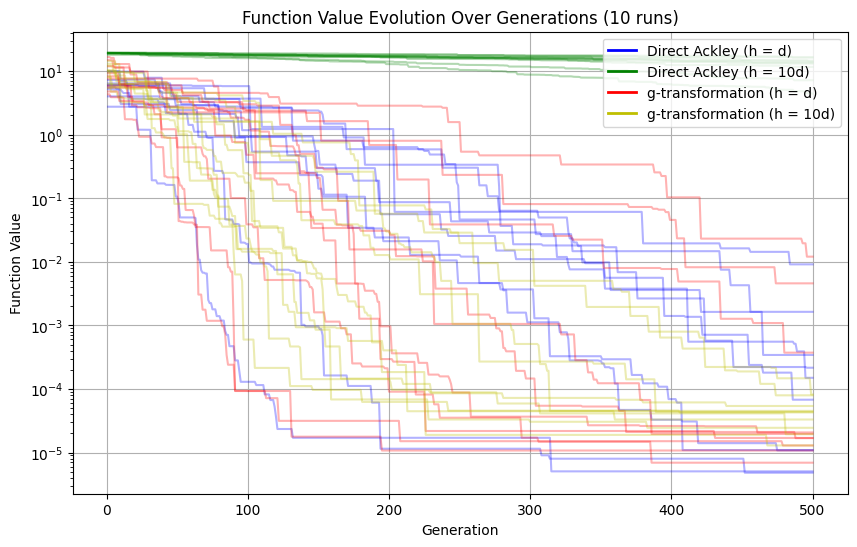

In [7]:
def ackley_function(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    term1 = -a * np.exp(-b * np.sqrt(np.sum(np.square(x)) / d))
    term2 = -np.exp(np.sum(np.cos(c * np.array(x))) / d)
    return term1 + term2 + a + np.exp(1)

def g(y, A, b, f):
    return f(np.dot(A, y) + b)

def population_evaluation(p, f):
    values = [f(individual) for individual in p[0]]
    return np.array(values)

def population_evaluation_transformed(p, A, b, f):
    values = [g(individual, A, b, f) for individual in p[0]]
    return np.array(values)

def parent_selection(p, l, f_vals):
    indices = np.argsort(f_vals)[:l]
    selected_x = [p[0][i] for i in indices]
    selected_sigma = [p[1][i] for i in indices]
    return [selected_x, selected_sigma]

def mutation(p, t, t_0, lower_bound, upper_bound):
    x, sigma = p[0], p[1]
    epsilon_0 = random.gauss(0, t_0)
    sigma = [[max(1e-4, i * np.exp(epsilon_0 + random.gauss(0, t))) for i in s] for s in sigma]
    x = [
        [
            np.clip(x[i][dim] + random.gauss(0, sigma[i][dim]), lower_bound, upper_bound)
            for dim in range(len(x[i]))
        ]
        for i in range(len(x))
    ]
    return [x, sigma]

def ES_direct(m, l, t, h, t0, f, T, random_population, lower_bound, upper_bound):
    p = random_population(m, h)
    f_vals = population_evaluation(p, f)
    best_solution, best_function_value = None, float('inf')
    function_value_history = []
    for generation in range(T):
        p_c = parent_selection(p, l, f_vals)
        p_c_mutated = mutation(p_c, t, t0, lower_bound, upper_bound)
        combined_x = p[0] + p_c_mutated[0]
        combined_sigma = p[1] + p_c_mutated[1]
        combined_population = [combined_x, combined_sigma]
        f_vals_combined = population_evaluation(combined_population, f)
        combined_population_with_function_values = list(zip(combined_x, combined_sigma, f_vals_combined))
        combined_population_sorted = sorted(combined_population_with_function_values, key=lambda x: x[2])
        selected_combined_x = [individual[0] for individual in combined_population_sorted[:m]]
        selected_combined_sigma = [individual[1] for individual in combined_population_sorted[:m]]
        p = [selected_combined_x, selected_combined_sigma]
        for i in range(m):
            current_function_value = combined_population_sorted[i][2]
            if current_function_value < best_function_value:
                best_function_value = current_function_value
                best_solution = combined_population_sorted[i][0]
        function_value_history.append(best_function_value)
    return best_solution, best_function_value, function_value_history

def ES_transformed(m, l, t, h, t0, f, T, random_population, A, b, lower_bound, upper_bound):
    p = random_population(m, h)
    f_vals = population_evaluation_transformed(p, A, b, f)
    best_solution, best_function_value = None, float('inf')
    function_value_history = []
    for generation in range(T):
        p_c = parent_selection(p, l, f_vals)
        p_c_mutated = mutation(p_c, t, t0, lower_bound, upper_bound)
        combined_x = p[0] + p_c_mutated[0]
        combined_sigma = p[1] + p_c_mutated[1]
        combined_population = [combined_x, combined_sigma]
        f_vals_combined = population_evaluation_transformed(combined_population, A, b, f)
        combined_population_with_function_values = list(zip(combined_x, combined_sigma, f_vals_combined))
        combined_population_sorted = sorted(combined_population_with_function_values, key=lambda x: x[2])
        selected_combined_x = [individual[0] for individual in combined_population_sorted[:m]]
        selected_combined_sigma = [individual[1] for individual in combined_population_sorted[:m]]
        p = [selected_combined_x, selected_combined_sigma]
        for i in range(m):
            current_function_value = combined_population_sorted[i][2]
            if current_function_value < best_function_value:
                best_function_value = current_function_value
                best_solution = combined_population_sorted[i][0]
        function_value_history.append(best_function_value)
    return best_solution, best_function_value, function_value_history

def random_population_ackley(m, h):
    x = [[random.uniform(-15, 30) for _ in range(h)] for _ in range(m)]
    sigma = [[random.uniform(0.1, 0.3) for _ in range(h)] for _ in range(m)]
    return [x, sigma]

m = 100
l = 20
t = np.log(0.1)
t0 = np.log(0.01)
d = 2
h1 = d
h2 = 10 * d
T = 500
lower_bound = -15
upper_bound = 30


num_runs = 10

trajectories_h1 = []
trajectories_h2 = []
trajectories_transformed_h1 = []
trajectories_transformed_h2 = []

for _ in range(num_runs):
    best_solution_h1, best_function_value_h1, trajectory_h1 = ES_direct(m, l, t, h1, t0, ackley_function, T, random_population_ackley, lower_bound, upper_bound)
    best_solution_h2, best_function_value_h2, trajectory_h2 = ES_direct(m, l, t, h2, t0, ackley_function, T, random_population_ackley, lower_bound, upper_bound)
    best_solution_transformed, best_function_value_transformed, trajectory_transformed = ES_transformed(
        m, l, t, h1, t0, ackley_function, T, random_population_ackley, A_h1, b_h1, lower_bound, upper_bound
    )
    best_solution_transformed2, best_function_value_transformed2, trajectory_transformed2 = ES_transformed(
        m, l, t, h2, t0, ackley_function, T, random_population_ackley, A_h2, b_h2, lower_bound, upper_bound
    )

    trajectories_h1.append(trajectory_h1)
    trajectories_h2.append(trajectory_h2)
    trajectories_transformed_h1.append(trajectory_transformed)
    trajectories_transformed_h2.append(trajectory_transformed2)

plt.figure(figsize=(10, 6))

for trajectory in trajectories_h1:
    plt.plot(range(1, T + 1), trajectory, color='b', alpha=0.3)

for trajectory in trajectories_h2:
    plt.plot(range(1, T + 1), trajectory, color='g', alpha=0.3)

for trajectory in trajectories_transformed_h1:
    plt.plot(range(1, T + 1), trajectory, color='r', alpha=0.3)

for trajectory in trajectories_transformed_h2:
    plt.plot(range(1, T + 1), trajectory, color='y', alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Function Value")
plt.yscale("log")
plt.title("Function Value Evolution Over Generations (10 runs)")

plt.legend(
    handles=[
        plt.Line2D([0], [0], color='b', lw=2),
        plt.Line2D([0], [0], color='g', lw=2),
        plt.Line2D([0], [0], color='r', lw=2),
        plt.Line2D([0], [0], color='y', lw=2)
    ],
    labels=["Direct Ackley (h = d)", "Direct Ackley (h = 10d)",
            "g-transformation (h = d)", "g-transformation (h = 10d)"],
    loc='upper right'
)
plt.grid(True)
plt.show()


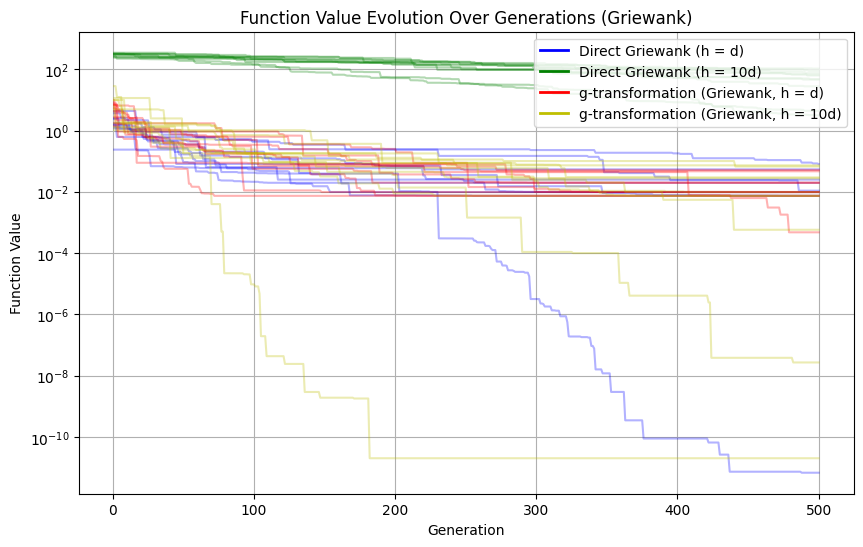

In [8]:
def griewank_function(x):
    sum_term = sum([i**2 for i in x]) / 4000
    product_term = np.prod([np.cos(i / np.sqrt(idx + 1)) for idx, i in enumerate(x)])
    return 1 + sum_term - product_term

def random_population_griewank(m, d):
    x = [[random.uniform(-600, 600) for _ in range(d)] for _ in range(m)]
    sigma = [[random.uniform(0.1, 0.3) for _ in range(d)] for _ in range(m)]
    return [x, sigma]

m = 100
l = 20
t = np.log(0.1)
t0 = np.log(0.01)
d = 2
h1 = d
h2 = 10 * d
T = 500
lower_bound = -600
upper_bound = 600


num_runs = 10

trajectories_h1 = []
trajectories_h2 = []
trajectories_transformed_h1 = []
trajectories_transformed_h2 = []

for _ in range(num_runs):
    best_solution_h1, best_function_value_h1, trajectory_h1 = ES_direct(
        m, l, t, h1, t0, griewank_function, T, random_population_griewank, lower_bound, upper_bound
    )
    best_solution_h2, best_function_value_h2, trajectory_h2 = ES_direct(
        m, l, t, h2, t0, griewank_function, T, random_population_griewank, lower_bound, upper_bound
    )
    best_solution_transformed_h1, best_function_value_transformed_h1, trajectory_transformed_h1 = ES_transformed(
        m, l, t, h1, t0, griewank_function, T, random_population_griewank, A_h1, b_h1, lower_bound, upper_bound
    )
    best_solution_transformed_h2, best_function_value_transformed_h2, trajectory_transformed_h2 = ES_transformed(
        m, l, t, h2, t0, griewank_function, T, random_population_griewank, A_h2, b_h2, lower_bound, upper_bound
    )

    trajectories_h1.append(trajectory_h1)
    trajectories_h2.append(trajectory_h2)
    trajectories_transformed_h1.append(trajectory_transformed_h1)
    trajectories_transformed_h2.append(trajectory_transformed_h2)

plt.figure(figsize=(10, 6))

for trajectory in trajectories_h1:
    plt.plot(range(1, T + 1), trajectory, color='b', alpha=0.3)

for trajectory in trajectories_h2:
    plt.plot(range(1, T + 1), trajectory, color='g', alpha=0.3)

for trajectory in trajectories_transformed_h1:
    plt.plot(range(1, T + 1), trajectory, color='r', alpha=0.3)

for trajectory in trajectories_transformed_h2:
    plt.plot(range(1, T + 1), trajectory, color='y', alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Function Value")
plt.yscale("log")
plt.title("Function Value Evolution Over Generations (Griewank)")

plt.legend(
    handles=[
        plt.Line2D([0], [0], color='b', lw=2),
        plt.Line2D([0], [0], color='g', lw=2),
        plt.Line2D([0], [0], color='r', lw=2),
        plt.Line2D([0], [0], color='y', lw=2)
    ],
    labels=["Direct Griewank (h = d)", "Direct Griewank (h = 10d)",
            "g-transformation (Griewank, h = d)", "g-transformation (Griewank, h = 10d)"],
    loc='upper right'
)
plt.grid(True)
plt.show()


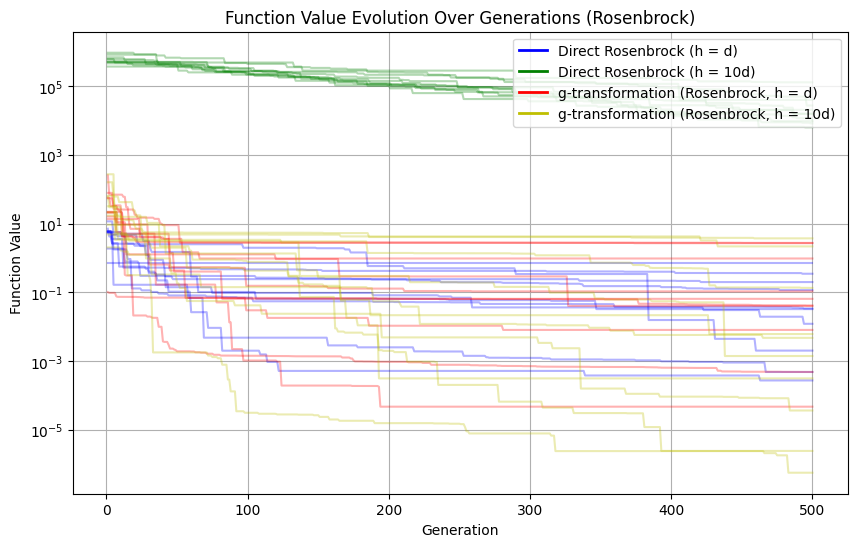

In [9]:
def rosenbrock_function(x):
    d = len(x)
    return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(d-1))

def random_population_rosenbrock(m, d, lower_bound=-5, upper_bound=10):
    population = [[random.uniform(lower_bound, upper_bound) for _ in range(d)] for _ in range(m)]
    sigma = [[random.uniform(0.1, 0.3) for _ in range(d)] for _ in range(m)]
    return [population, sigma]

m = 100
l = 20
t = np.log(0.1)
t0 = np.log(0.01)
d = 2
h1 = d
h2 = 10 * d
T = 500
lower_bound = -5
upper_bound = 10

num_runs = 10

trajectories_h1 = []
trajectories_h2 = []
trajectories_transformed_h1 = []
trajectories_transformed_h2 = []

for _ in range(num_runs):
    best_solution_h1, best_function_value_h1, trajectory_h1 = ES_direct(
        m, l, t, h1, t0, rosenbrock_function, T, random_population_rosenbrock, lower_bound, upper_bound
    )
    best_solution_h2, best_function_value_h2, trajectory_h2 = ES_direct(
        m, l, t, h2, t0, rosenbrock_function, T, random_population_rosenbrock, lower_bound, upper_bound
    )
    best_solution_transformed_h1, best_function_value_transformed_h1, trajectory_transformed_h1 = ES_transformed(
        m, l, t, h1, t0, rosenbrock_function, T, random_population_rosenbrock, A_h1, b_h1, lower_bound, upper_bound
    )
    best_solution_transformed_h2, best_function_value_transformed_h2, trajectory_transformed_h2 = ES_transformed(
        m, l, t, h2, t0, rosenbrock_function, T, random_population_rosenbrock, A_h2, b_h2, lower_bound, upper_bound
    )

    trajectories_h1.append(trajectory_h1)
    trajectories_h2.append(trajectory_h2)
    trajectories_transformed_h1.append(trajectory_transformed_h1)
    trajectories_transformed_h2.append(trajectory_transformed_h2)

plt.figure(figsize=(10, 6))

for trajectory in trajectories_h1:
    plt.plot(range(1, T + 1), trajectory, color='b', alpha=0.3)

for trajectory in trajectories_h2:
    plt.plot(range(1, T + 1), trajectory, color='g', alpha=0.3)

for trajectory in trajectories_transformed_h1:
    plt.plot(range(1, T + 1), trajectory, color='r', alpha=0.3)

for trajectory in trajectories_transformed_h2:
    plt.plot(range(1, T + 1), trajectory, color='y', alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Function Value")
plt.yscale("log")
plt.title("Function Value Evolution Over Generations (Rosenbrock)")

plt.legend(
    handles=[
        plt.Line2D([0], [0], color='b', lw=2),
        plt.Line2D([0], [0], color='g', lw=2),
        plt.Line2D([0], [0], color='r', lw=2),
        plt.Line2D([0], [0], color='y', lw=2)
    ],
    labels=["Direct Rosenbrock (h = d)", "Direct Rosenbrock (h = 10d)",
            "g-transformation (Rosenbrock, h = d)", "g-transformation (Rosenbrock, h = 10d)"],
    loc='upper right'
)
plt.grid(True)
plt.show()


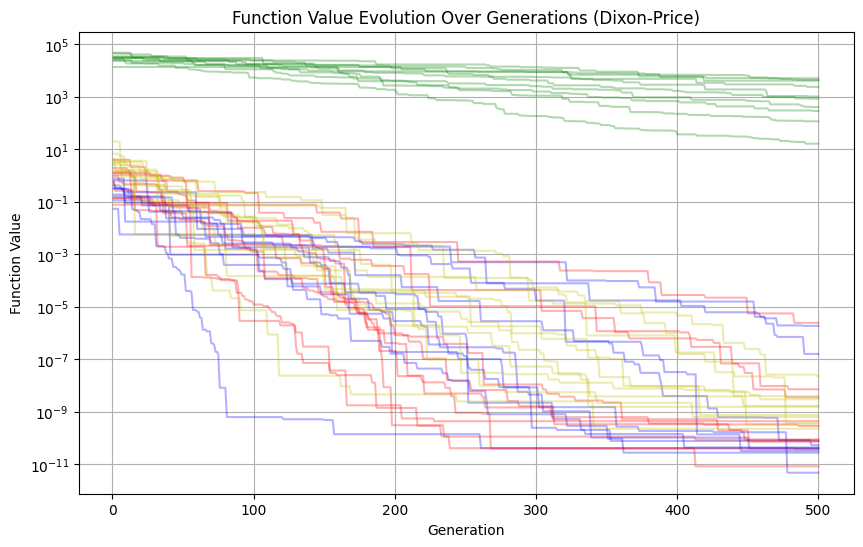

In [10]:
def dixon_price_function(x):
    d = len(x)
    term1 = (x[0] - 1) ** 2
    term2 = sum((i + 1) * (2 * x[i] ** 2 - x[i - 1]) ** 2 for i in range(1, d))
    return term1 + term2

def random_population_dixon_price(m, d, lower_bound=-5, upper_bound=5):
    population = [[random.uniform(lower_bound, upper_bound) for _ in range(d)] for _ in range(m)]
    sigma = [[random.uniform(0.1, 0.3) for _ in range(d)] for _ in range(m)]
    return [population, sigma]

m = 100
l = 20
t = np.log(0.1)
t0 = np.log(0.01)
d = 2
h1 = d
h2 = 10 * d
T = 500
lower_bound = -5
upper_bound = 5

num_runs = 10

trajectories_h1 = []
trajectories_h2 = []
trajectories_transformed_h1 = []
trajectories_transformed_h2 = []

for _ in range(num_runs):
    best_solution_h1, best_function_value_h1, trajectory_h1 = ES_direct(
        m, l, t, h1, t0, dixon_price_function, T, random_population_dixon_price, lower_bound, upper_bound
    )
    best_solution_h2, best_function_value_h2, trajectory_h2 = ES_direct(
        m, l, t, h2, t0, dixon_price_function, T, random_population_dixon_price, lower_bound, upper_bound
    )
    best_solution_transformed_h1, best_function_value_transformed_h1, trajectory_transformed_h1 = ES_transformed(
        m, l, t, h1, t0, dixon_price_function, T, random_population_dixon_price, A_h1, b_h1, lower_bound, upper_bound
    )
    best_solution_transformed_h2, best_function_value_transformed_h2, trajectory_transformed_h2 = ES_transformed(
        m, l, t, h2, t0, dixon_price_function, T, random_population_dixon_price, A_h2, b_h2, lower_bound, upper_bound
    )

    trajectories_h1.append(trajectory_h1)
    trajectories_h2.append(trajectory_h2)
    trajectories_transformed_h1.append(trajectory_transformed_h1)
    trajectories_transformed_h2.append(trajectory_transformed_h2)

plt.figure(figsize=(10, 6))

for trajectory in trajectories_h1:
    plt.plot(range(1, T + 1), trajectory, color='b', alpha=0.3)

for trajectory in trajectories_h2:
    plt.plot(range(1, T + 1), trajectory, color='g', alpha=0.3)

for trajectory in trajectories_transformed_h1:
    plt.plot(range(1, T + 1), trajectory, color='r', alpha=0.3)

for trajectory in trajectories_transformed_h2:
    plt.plot(range(1, T + 1), trajectory, color='y', alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Function Value")
plt.yscale("log")
plt.title("Function Value Evolution Over Generations (Dixon-Price)")

plt.grid(True)
plt.show()


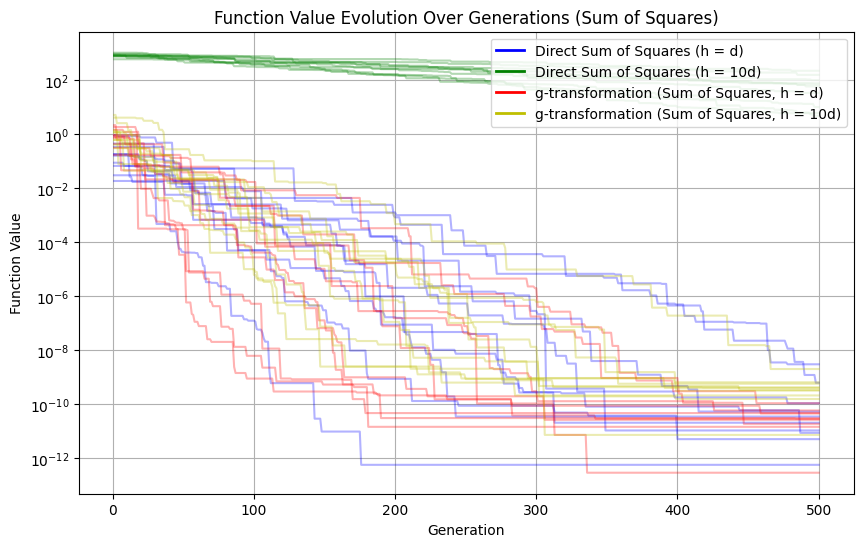

In [11]:
def sum_of_squares_function(x):
    return sum((i + 1) * x[i] ** 2 for i in range(len(x)))

def random_population_sum_of_squares(m, d, lower_bound=-5, upper_bound=5):
    population = [[random.uniform(lower_bound, upper_bound) for _ in range(d)] for _ in range(m)]
    sigma = [[random.uniform(0.1, 0.3) for _ in range(d)] for _ in range(m)]
    return [population, sigma]

m = 100
l = 20
t = np.log(0.1)
t0 = np.log(0.01)
d = 2
h1 = d
h2 = 10 * d
T = 500
lower_bound = -5
upper_bound = 5

num_runs = 10

trajectories_h1 = []
trajectories_h2 = []
trajectories_transformed_h1 = []
trajectories_transformed_h2 = []

for _ in range(num_runs):
    best_solution_h1, best_function_value_h1, trajectory_h1 = ES_direct(
        m, l, t, h1, t0, sum_of_squares_function, T, random_population_sum_of_squares, lower_bound, upper_bound
    )
    best_solution_h2, best_function_value_h2, trajectory_h2 = ES_direct(
        m, l, t, h2, t0, sum_of_squares_function, T, random_population_sum_of_squares, lower_bound, upper_bound
    )
    best_solution_transformed_h1, best_function_value_transformed_h1, trajectory_transformed_h1 = ES_transformed(
        m, l, t, h1, t0, sum_of_squares_function, T, random_population_sum_of_squares, A_h1, b_h1, lower_bound, upper_bound
    )
    best_solution_transformed_h2, best_function_value_transformed_h2, trajectory_transformed_h2 = ES_transformed(
        m, l, t, h2, t0, sum_of_squares_function, T, random_population_sum_of_squares, A_h2, b_h2, lower_bound, upper_bound
    )

    trajectories_h1.append(trajectory_h1)
    trajectories_h2.append(trajectory_h2)
    trajectories_transformed_h1.append(trajectory_transformed_h1)
    trajectories_transformed_h2.append(trajectory_transformed_h2)

plt.figure(figsize=(10, 6))

for trajectory in trajectories_h1:
    plt.plot(range(1, T + 1), trajectory, color='b', alpha=0.3)

for trajectory in trajectories_h2:
    plt.plot(range(1, T + 1), trajectory, color='g', alpha=0.3)

for trajectory in trajectories_transformed_h1:
    plt.plot(range(1, T + 1), trajectory, color='r', alpha=0.3)

for trajectory in trajectories_transformed_h2:
    plt.plot(range(1, T + 1), trajectory, color='y', alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Function Value")
plt.yscale("log")
plt.title("Function Value Evolution Over Generations (Sum of Squares)")

plt.legend(
    handles=[
        plt.Line2D([0], [0], color='b', lw=2),
        plt.Line2D([0], [0], color='g', lw=2),
        plt.Line2D([0], [0], color='r', lw=2),
        plt.Line2D([0], [0], color='y', lw=2)
    ],
    labels=["Direct Sum of Squares (h = d)", "Direct Sum of Squares (h = 10d)",
            "g-transformation (Sum of Squares, h = d)", "g-transformation (Sum of Squares, h = 10d)"],
    loc='upper right'
)
plt.grid(True)
plt.show()


A_stretch:
[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]]

A_compress:
[[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]]


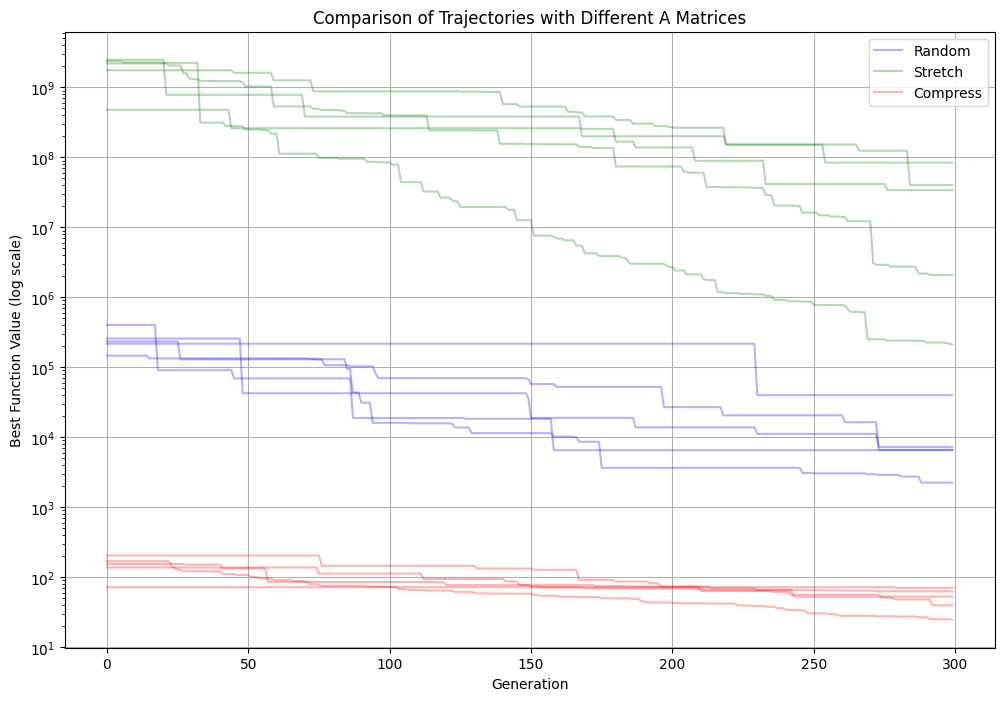

In [30]:
def random_population_rosenbrock(m, d, lower_bound=-5, upper_bound=10):
    population = [[random.uniform(lower_bound, upper_bound) for _ in range(d)] for _ in range(m)]
    sigma = [[random.uniform(200, 300) for _ in range(d)] for _ in range(m)]
    return [population, sigma]

d = 10
h = 10
m = 50
l = 10
t = np.log(0.1)
t0 = np.log(0.01)
T = 300
lower_bound = -15
upper_bound = 30
num_runs = 5

np.random.seed(42)
A_random = np.random.rand(d, h)
A_stretch = np.eye(d)*10
A_compress = np.eye(d)*0.1



b = np.random.rand(d)

print("A_stretch:")
print(A_stretch)

print("\nA_compress:")
print(A_compress)

results_random, results_stretch, results_compress = [], [], []

for _ in range(num_runs):
    _, _, history_random = ES_transformed(m, l, t, h, t0, rosenbrock_function, T, random_population_rosenbrock, A_random, b, lower_bound, upper_bound)
    _, _, history_stretch = ES_transformed(m, l, t, h, t0, rosenbrock_function, T, random_population_rosenbrock, A_stretch, b, lower_bound, upper_bound)
    _, _, history_compress = ES_transformed(m, l, t, h, t0, rosenbrock_function, T, random_population_rosenbrock, A_compress, b, lower_bound, upper_bound)

    results_random.append(history_random)
    results_stretch.append(history_stretch)
    results_compress.append(history_compress)

plt.figure(figsize=(12, 8))

for result in results_random:
    plt.plot(result, color='blue', alpha=0.3, label='Random' if result == results_random[0] else "")
for result in results_stretch:
    plt.plot(result, color='green', alpha=0.3, label='Stretch' if result == results_stretch[0] else "")
for result in results_compress:
    plt.plot(result, color='red', alpha=0.3, label='Compress' if result == results_compress[0] else "")

plt.xlabel('Generation')
plt.ylabel('Best Function Value (log scale)')
plt.yscale('log')
plt.title('Comparison of Trajectories with Different A Matrices')
plt.legend()
plt.grid(True)
plt.show()
